In [4]:
import tensorflow as tf


In [5]:
tf.__version__


'1.10.1'

# 1.变量



In [6]:
a = 3
w = tf.Variable([[2.0,3.0]])
x = tf.Variable([[2.0],[5.0]])

y = tf.matmul(w,x)


b = tf.zeros([3,4])
c = tf.zeros_like(b)
d = tf.ones([3,4])

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    sess.run(y)
    sess.run(b)
    sess.run(c)
    sess.run(d)
    print(d.eval())
    print(c.eval())
    print(y.eval())
    print(b.eval())


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[19.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [7]:
norm = tf.random_normal([2,3],mean=-1,stddev=4)
a=tf.constant([[1,2],[3,4],[5,6]])
shuff = tf.random_shuffle(a)
with tf.Session() as sess:
    sess.run(norm)
    print(sess.run(norm))
    print(sess.run(shuff))




[[ 5.8377256  3.5494013  5.736186 ]
 [-3.3436642  5.264261  -4.749075 ]]
[[1 2]
 [5 6]
 [3 4]]


In [8]:
#定义变量
state = tf.Variable(0)
#option add
new_state = tf.add(state,tf.constant(1))
#赋值
upstate = tf.assign(state,new_state)
#初始化变量
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    for _ in range(3):
        sess.run(upstate)
        print(sess.run(state))
        
        




0
1
2
3


In [9]:
import numpy as np

a = np.zeros([2,3])
#转换为tensor
b = tf.convert_to_tensor(a)

with tf.Session() as sess:
    print(sess.run(b))

[[0. 0. 0.]
 [0. 0. 0.]]


In [10]:
a = tf.constant(5)
b = tf.constant(10)

x = tf.add(a,b)
y = tf.divide(a,b)


with tf.Session() as sess:
    print(sess.run(x))
    print(sess.run(y))

15
0.5


In [11]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1,input2)

with tf.Session() as sess:
    print(sess.run([output],feed_dict={input1:[7,2],input2:[2,3]}))


[array([14.,  6.], dtype=float32)]


# 实现线性回归


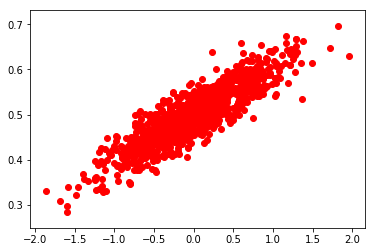

In [13]:
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

#随机生成1000个点
points_num = 1000
vector_set = []

for i in range(points_num):
    x1 = np.random.normal(0.0,0.55)
    y1 = x1 * 0.1 + 0.5 + np.random.normal(0.0,0.03)
    vector_set.append([x1,y1])
x_data = [v[0] for v in vector_set]
y_data = [v[1] for v in vector_set]


plt.scatter(x_data,y_data,c = 'r')
plt.show()



In [25]:
#y=Wx + b
#创建权重 W 在-1 到 1之间
W = tf.Variable(tf.random_uniform([1],-1.0,1.0),name='W')
#初始化 b，
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))
#优化器 梯度下降 学习率0.5
optimizer = tf.train.GradientDescentOptimizer(0.5)

#最小化损失函数
train = optimizer.minimize(loss)


sess = tf.Session()
#初始化全局变量
init = tf.global_variables_initializer()

sess.run(init)

print('W = ',sess.run(W),'b=',sess.run(b),'loss = ',sess.run(loss))

for step in range(20):
    sess.run(train)
    print( 'step=',step,  'W = ',sess.run(W),'b=',sess.run(b),'loss = ',sess.run(loss))
    







W =  [-0.9228437] b= [0.] loss =  0.5814012
step= 0 W =  [-0.596649] b= [0.4939837] loss =  0.15710808
step= 1 W =  [-0.37269977] b= [0.49564222] loss =  0.07290174
step= 2 W =  [-0.22066328] b= [0.49678093] loss =  0.034091897
step= 3 W =  [-0.11744741] b= [0.49755397] loss =  0.016204827
step= 4 W =  [-0.04737534] b= [0.4980788] loss =  0.00796086
step= 5 W =  [0.0001958] b= [0.49843508] loss =  0.004161299
step= 6 W =  [0.03249131] b= [0.498677] loss =  0.0024101206
step= 7 W =  [0.05441636] b= [0.4988412] loss =  0.00160302
step= 8 W =  [0.06930104] b= [0.49895266] loss =  0.0012310353
step= 9 W =  [0.07940608] b= [0.49902835] loss =  0.0010595914
step= 10 W =  [0.08626626] b= [0.49907973] loss =  0.0009805749
step= 11 W =  [0.09092357] b= [0.4991146] loss =  0.0009441569
step= 12 W =  [0.09408537] b= [0.4991383] loss =  0.0009273722
step= 13 W =  [0.09623187] b= [0.49915436] loss =  0.0009196362
step= 14 W =  [0.09768911] b= [0.49916527] loss =  0.0009160709
step= 15 W =  [0.09867

# Mnist 数据集

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow import keras
import numpy as np

In [4]:
mnist = input_data.read_data_sets('./MNIST_data/',one_hot=True)
print('类型是：%s' % (type(mnist)))
print('训练数据有 %d' % (mnist.train.num_examples))
print('测试数据有 %d' %(mnist.test.num_examples))

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
类型是：<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
训练数据有 55000
测试数据有 10000


In [5]:
train_image = mnist.train.images
train_lables = mnist.train.labels
test_image = mnist.test.images
test_lables = mnist.test.labels

print('data type = %s' % (type(train_image)))
print('lables type = %s' % (type(train_lables)))

data type = <class 'numpy.ndarray'>
lables type = <class 'numpy.ndarray'>


[32037 48033 35629 42088 39668]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
32037th 训练数据标签是6


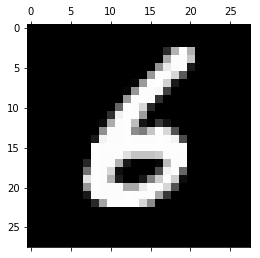

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
48033th 训练数据标签是2


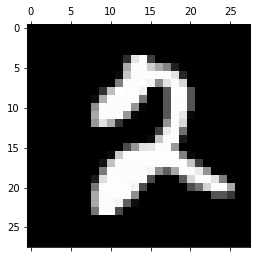

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
35629th 训练数据标签是8


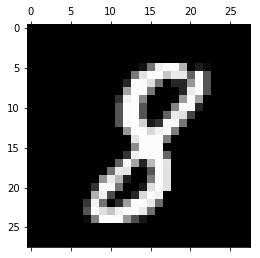

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
42088th 训练数据标签是2


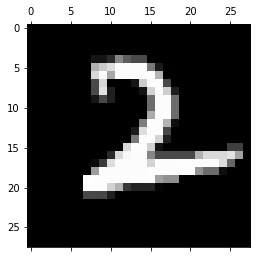

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
39668th 训练数据标签是4


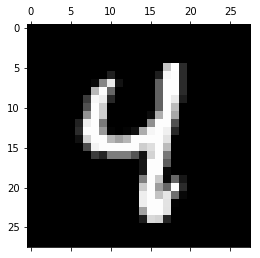

In [9]:
nsample = 5
index = np.random.randint(train_image.shape[0],size=nsample)
print(index)
for i in index:
    curr_img = np.reshape(train_image[i,:],
                         (28,28))
    print(train_lables[i,:])
    
    curr_lable = np.argmax(train_lables[i,:])#最大值
    plt.matshow(curr_img,cmap=plt.get_cmap('gray'))
    print(''+str(i)+'th 训练数据'+'标签是'+str(curr_lable))
    plt.show()

In [22]:
batch_size = 100
batch_xs, batch_ys = mnist.train.next_batch(batch_size=batch_size)
print('batch data %s\nbatch lable %s' % 
    (type(batch_xs),type(batch_ys)) )
print('data shape = %s\nlable shape = %s' % (batch_xs.shape,batch_ys.shape))




batch data <class 'numpy.ndarray'>
batch lable <class 'numpy.ndarray'>
data shape = (100, 784)
lable shape = (100, 10)


# 逻辑回归

In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow import keras
import numpy as np


In [27]:
#设置参数
output = 10
inputsize = 784
trainSteps = 50000
batch_size = 64


In [28]:
X = tf.placeholder(tf.float32,shape=[None,inputsize])
Y = tf.placeholder(tf.float32,shape=[None,output])


In [29]:
W1 = tf.Variable(tf.random_normal([inputsize,output],stddev=0.1))
B1 = tf.Variable(tf.constant(0.1),[output])


In [32]:
y_pre = tf.nn.softmax(tf.matmul(X,W1)+B1)

loss = tf.reduce_mean(tf.square(Y - y_pre))
opt = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y_pre,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,'float'))


In [42]:
with tf.Session() as sess:
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    
    for i in range(trainSteps):
            batch = mnist.train.next_batch(batch_size)
            batch_input = batch[0]
            batch_lables = batch[1]
            train_loss = sess.run([opt,loss],feed_dict={X:batch_input,Y:batch_lables})
            if i%1000 == 0 :
                train_accuracy = accuracy.eval(session=sess, feed_dict={X:batch_input,Y:batch_lables})
                print('step %d   train accuracy %g' % (i, train_accuracy))
        
        




        
        
        
        
        
        

InvalidArgumentError: Expected dimension in the range [-1, 1), but got 1
	 [[Node: ArgMax_1 = ArgMax[T=DT_UINT8, Tidx=DT_INT32, output_type=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"](ArgMax_1/input, ArgMax/dimension)]]

Caused by op 'ArgMax_1', defined at:
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/asyncio/base_events.py", line 1425, in _run_once
    handle._run()
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-7210aebc8e38>", line 6, in <module>
    correct_prediction = tf.equal(tf.argmax(y_pre,1),tf.argmax(y,1))
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 88, in argmax
    return gen_math_ops.arg_max(input, axis, name=name, output_type=output_type)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 783, in arg_max
    name=name)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/Users/ianwong/anaconda3/envs/python35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Expected dimension in the range [-1, 1), but got 1
	 [[Node: ArgMax_1 = ArgMax[T=DT_UINT8, Tidx=DT_INT32, output_type=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"](ArgMax_1/input, ArgMax/dimension)]]
